<p style="text-align:left">
    <a href="https://www.flipkart.com/laptops/pr?sid=6bo,b5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_5d98fbb1-a637-48af-ab24-282335c1ae80_1_372UD5BXDFYS_MC.F6KJFVU7EOGS&otracker=hp_rich_navigation_1_1.navigationCard.RICH_NAVIGATION_Electronics~Laptop%2Band%2BDesktop~All_F6KJFVU7EOGS&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_1_L2_view-all&cid=F6KJFVU7EOGS">
    <img src="https://w7.pngwing.com/pngs/210/506/png-transparent-infographic-illustration-laptop-electronics-text-hand.png" width="200" alt="Laptop Logo"  />
    </a>
</p>


# Linear Regression


We are trying to build the model, that can predict the prices of the Laptop based on the feature usch as `RAM, PROCESSOR, SCREEN, STORAGE, TYPE` which mostly influnces the price.

In this notebook, we will perform a simple linear regression analysis on a Laptop price dataset, show how this prediction analysis is done and what are the important assumptions that must be satisfied for linear regression. We will also look at different ways to transform our data.


## Objectives


*   Check for the Data Cleaniness and Data Disitribution
*   Select the significant features based on the visual analysis
*   Perform feature engineering if required
*   Apply the Linear Regression model and make the predictions
*   Apply the pipelines to transform the data

## Setup
For this lab, we will be using the following libraries:

In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
import skillsnetwork as skillsnetwork

In [559]:
import warnings 
warnings.filterwarnings('ignore')

## Loading data from CSV available on URL

In [560]:
import skillsnetwork
## Loading the district wise Data
URL = 'https://raw.githubusercontent.com/geek-vinit/Internship/main/LaptopPrice.csv'

await skillsnetwork.download_dataset(URL)

Saved as 'LaptopPrice.csv'


In [561]:
#Creating new dataframe for the datset 
df = pd.read_csv("LaptopPrice.csv",encoding='latin-1')

df_copy = df

#enabling to display all the columns at a once
pd.set_option('display.max_columns', None)

df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [562]:
#information such as number of columns, column labels, column data types, memory usage, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


**Findings :**

1. Total Number of rows in dataset : **1303**
2. Total Number of columns in dataset : **13**
3. Columns with Float64 data type are :`Inches`,`Price_euros`
4. Columns with int64 data type are : `laptop_ID`
5. Rest of the columns are showing data type i.e. `object`
6. Data type of `RAM`,`MEMORY` need to be maintain in integer form
7. `Price` column to be converted into rupees and data type as integer



In [563]:
# To get count of unique values in each column
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [564]:
# Column names
TEXT = ' List of total columns head :'
print (TEXT.center(120, '-'))
print('\n',df.columns.tolist(),'\n')

#to get list of particular column unique values
TEXT = ' List of Companies :'
print (TEXT.center(120, '-'))
print('\n',df.Company.unique().tolist(),"\n")


#to get list of particular column unique values
TEXT = ' List of Laptop Types :'
print (TEXT.center(120, '-'))
print('\n',df.TypeName.unique().tolist(),"\n")


#to get list of particular column unique values
TEXT = ' List of Operating Systems :'
print (TEXT.center(120, '-'))
print('\n',df.OpSys.unique().tolist(),"\n")

--------------------------------------------- List of total columns head :----------------------------------------------

 ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'] 

-------------------------------------------------- List of Companies :--------------------------------------------------

 ['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'] 

------------------------------------------------ List of Laptop Types :-------------------------------------------------

 ['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible', 'Workstation'] 

---------------------------------------------- List of Operating Systems :----------------------------------------------

 ['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Win

**Findings :**

1. Total Number of Laptop Types : **6**
2. Total Number of columns in dataset : **9**


In [565]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


**Findings :**

1. Here Mean of the Price is **1123.686992** which is larger than the median i.e 50 percentile **977**.
**This gives the hint of Right skewed data**



We are going to inspect whether our 'Price_euros' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Price_euros' distribution using the distplot() function from the seaborn library.

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

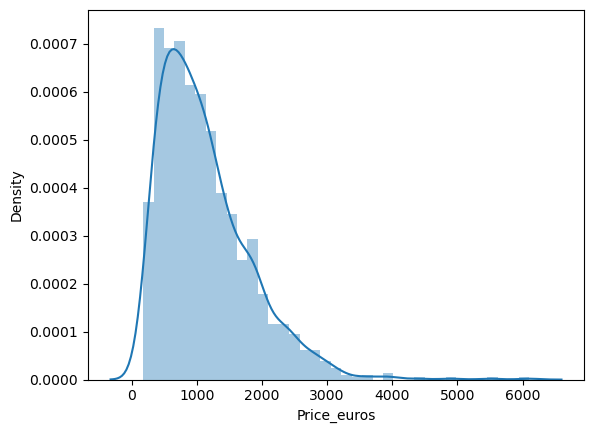

In [566]:
sns.distplot(df['Price_euros'])

As the plot shows, our 'Price_euros' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics skewness is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.

Here, we can simply use the skew() function to calculate our skewness level of the `Price_euros`

In [567]:
print("Skewness: %f" % df['Price_euros'].skew())

Skewness: 1.520866


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have **~1.52**, so it is considered highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the np.log() function from the numpy library to perform log transform.

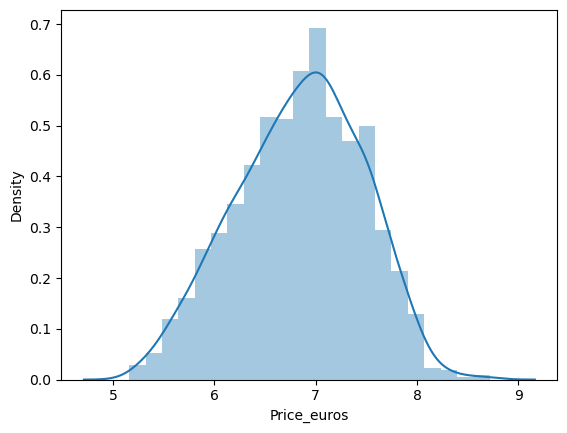

In [568]:
log_transformed = np.log(df['Price_euros'])

sp_transformed = sns.distplot(log_transformed)

In [569]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.174130


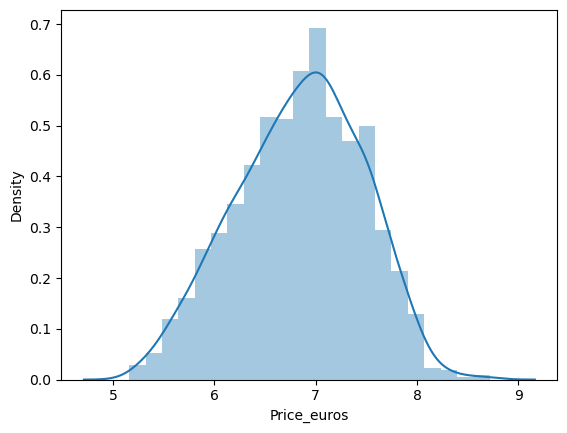

In [570]:
Sqrt_transformed = np.sqrt(df['Price_euros'])

price_transformed = sns.distplot(log_transformed)

In [571]:
print("Skewness: %f" % (Sqrt_transformed).skew())

Skewness: 0.568290


**Findigs :**
1. As we can see, the log method transformed the 'Price_euros' distribution into a more symmetrical bell curve and the skewness level now is **-0.174130** with log transformation, well within the range.

###  Handling the Duplicates

Having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas duplicated() function and search by the 'laptop_ID' column, which contains a unique index number for each entry.

In [572]:
#for particular column containig unique details
duplicate = df[df.duplicated(['laptop_ID'])]
#for whole dataframe
duplicate = df[df.duplicated()]
duplicate

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


### Finding the Missing Values

For easier detection of missing values, pandas provides the isna(), isnull(), and notna() functions. For more information on pandas missing values please check out this documentation.

To summarize all the missing values in our dataset, we will use isnull() function. Then, we will add them all up, by using sum() function, sort them with sort_values() function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the bar plot function from the matplotlib library.

In [573]:
total = df.isnull().sum()
total

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

**Findings :**

1. No `Duplicates`, No `Nulls` found.

## **Data Wrangling**


## Selecting and renaming the columns of interest

### **ScreenResolution Column**

IPS, Full HD, Retina, 4K Ultra HD, Touchscreen are the parameters which highly influence the price of the laptop but stored as string in single column `Screenresolution`. We will try to create diffrent categorical column for this vital data.

In [574]:
# Creating individual column for each category

df['IPS Display'] = df['ScreenResolution'].apply(lambda x:"Yes" if 'IPS' in x else "No")

df['Full HD Display'] = df['ScreenResolution'].apply(lambda x:"Yes" if 'Full HD' in x else "No")

df['Retina Ready'] = df['ScreenResolution'].apply(lambda x:"Yes" if 'Retina' in x else "No")

df['4K Ultra HD'] = df['ScreenResolution'].apply(lambda x:"Yes" if '4K Ultra HD' in x else "No")

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:"Yes" if 'Touchscreen' in x else "No")


# Converting pixle resolution to individual columns 

pixles= df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_pixles'] = pixles[0].str[-4:]
df['Y_pixles'] = pixles[1]



### **CPU Column**

Essential information like MAKE of CPU , Clockspeed, Type of Processor are mentioned in same column and stored as string. We will split require data into number of columns for better interpretation and model simplification.

In [575]:
Processores = df['Cpu'].str.split(' ',n=3,expand=True)
df['CPU Brand'] = Processores[0]
df['Clock_Speed'] = Processores[3].str[-6:].str.replace('GHz','')
df['Clock_Speed']= df['Clock_Speed'].apply(lambda x: '2.0' if 'U' in x else x)
df['Clock_Speed'] = df['Clock_Speed'].str.replace(' ','').astype(np.float64)

In [576]:
def processor_brand(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [577]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df['Cpu Type'] = df['Cpu Name'].apply(processor_brand)
df.drop(columns= 'Cpu Name', inplace=True)

### **RAM and Weight Column**

We will remove the 'GB' following after RAM capacity and 'KG' after its weight

In [578]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

### **Memory Column**

This columns is provided with String type format which contains data such as:
1. Primary Storage Type
2. Primary Storage capacity
3. Secondary storage Type
4. Secondary Storage cpacity

This all data is provided in single string. So we will create independant column each of this attribute

In [579]:
df['Pripmary Storage Type'] = df['Memory'].apply(lambda x:"SSD" if 'Flash Storage'in x or'SSD' in x else "HDD")
df['Secondary Memory'] = df['Memory'].apply(lambda x:"Yes" if '+' in x else "No")
Primary_Storage = df['Memory'].str.split(' ',n=1,expand=True)
df['Primary_Storage'] = Primary_Storage[0]

df['Primary_Storage']=df['Primary_Storage'].str.replace('GB',"")
df['Primary_Storage']=df['Primary_Storage'].str.replace('TB',"")
df['Primary_Storage']=df['Primary_Storage'].astype(float)
df['Primary_Storage'] = df['Primary_Storage'].apply(lambda x:x*1000 if (x<8) else x)

In [580]:
def secondary_memory(text):
    if '+'in text:
        return text.split('+')[1]
    else:
        return '0'
     

def secondary_memory_strg (text):
    if '1TB' in text:
        return 1000
    elif '2TB' in text:
        return 2000
    elif '256GB' in text:
        return 256
    elif '500GB' in text:
        return 500
    elif '1.0TB' in text:
        return 1000
    elif '512GB' in text:
        return 512
    else:
        return 0
    
def secondary_memory_type (text):
    if 'HDD' in text:
        return 'HDD'
    elif 'SSD' in text:
        return 'SSD'
    elif 'Hybrid' in text:
        return 'Hybrid'
    else:
        return 'NA'

In [583]:
df['Secondary_Memory'] = df['Memory'].apply(secondary_memory)
df['Secondary_Memory'] = df['Secondary_Memory'].apply(secondary_memory_strg)
df['Secondary_Memory_Type'] = df['Memory'].apply(secondary_memory)
df['Secondary_Memory_Type'] =df['Secondary_Memory_Type'].apply(secondary_memory_type)

### **GPU Column**

GPU column has model spicific data which may decreasse computability of this model. So we will extraxt just make of it.

In [584]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

### **OpSys Column**

We will convert this column based on type of OS make, and exclude the variant

In [585]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [586]:
df['Operating_System'] = df['OpSys'].apply(lambda x:x.split()[0])
df['Operating_System'].value_counts()

Windows    1125
No           66
Linux        62
Chrome       27
macOS        13
Mac           8
Android       2
Name: Operating_System, dtype: int64

In [587]:
df['Operating_System'] = df['Operating_System'].apply(lambda x: 'Mac' if 'mac' in x else x)
df['Operating_System'] = df['Operating_System'].apply(lambda x: 'No Preinstalled OS' if 'No' in x else x)
df['Operating_System'] = df['Operating_System'].apply(lambda x: 'Chrome / Android' if ('Android' in x) or ('Chrome' in x) else x)
df['Operating_System'].value_counts()

Windows               1125
No Preinstalled OS      66
Linux                   62
Chrome / Android        29
Mac                     21
Name: Operating_System, dtype: int64

### **Final DataFrame**

In [588]:
Final_df = df.drop(columns = ['laptop_ID','ScreenResolution','Cpu','Memory','Gpu','OpSys'])

In [589]:
Final_df.head(50)

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,IPS Display,Full HD Display,Retina Ready,4K Ultra HD,Touchscreen,X_pixles,Y_pixles,CPU Brand,Clock_Speed,Cpu Type,Pripmary Storage Type,Secondary Memory,Primary_Storage,Secondary_Memory,Secondary_Memory_Type,GPU_Brand,Operating_System
0,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,Yes,No,Yes,No,No,2560,1600,Intel,2.30,Intel Core i5,SSD,No,128.0,0,NA,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,1.34,898.94,No,No,No,No,No,1440,900,Intel,1.80,Intel Core i5,SSD,No,128.0,0,NA,Intel,Mac
2,HP,250 G6,Notebook,15.6,8,1.86,575.00,No,Yes,No,No,No,1920,1080,Intel,2.50,Intel Core i5,SSD,No,256.0,0,NA,Intel,No Preinstalled OS
3,Apple,MacBook Pro,Ultrabook,15.4,16,1.83,2537.45,Yes,No,Yes,No,No,2880,1800,Intel,2.70,Intel Core i7,SSD,No,512.0,0,NA,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1803.60,Yes,No,Yes,No,No,2560,1600,Intel,3.10,Intel Core i5,SSD,No,256.0,0,NA,Intel,Mac
5,Acer,Aspire 3,Notebook,15.6,4,2.1,400.00,No,No,No,No,No,1366,768,AMD,3.00,AMD Processor,HDD,No,500.0,0,NA,AMD,Windows
6,Apple,MacBook Pro,Ultrabook,15.4,16,2.04,2139.97,Yes,No,Yes,No,No,2880,1800,Intel,2.20,Intel Core i7,SSD,No,256.0,0,NA,Intel,Mac
7,Apple,Macbook Air,Ultrabook,13.3,8,1.34,1158.70,No,No,No,No,No,1440,900,Intel,1.80,Intel Core i5,SSD,No,256.0,0,NA,Intel,Mac
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,1.3,1495.00,No,Yes,No,No,No,1920,1080,Intel,1.80,Intel Core i7,SSD,No,512.0,0,NA,Nvidia,Windows
9,Acer,Swift 3,Ultrabook,14.0,8,1.6,770.00,Yes,Yes,No,No,No,1920,1080,Intel,1.60,Intel Core i5,SSD,No,256.0,0,NA,Intel,Windows


In [590]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                1303 non-null   object 
 1   Product                1303 non-null   object 
 2   TypeName               1303 non-null   object 
 3   Inches                 1303 non-null   float64
 4   Ram                    1303 non-null   object 
 5   Weight                 1303 non-null   object 
 6   Price_euros            1303 non-null   float64
 7   IPS Display            1303 non-null   object 
 8   Full HD Display        1303 non-null   object 
 9   Retina Ready           1303 non-null   object 
 10  4K Ultra HD            1303 non-null   object 
 11  Touchscreen            1303 non-null   object 
 12  X_pixles               1303 non-null   object 
 13  Y_pixles               1303 non-null   object 
 14  CPU Brand              1303 non-null   object 
 15  Cloc

In [591]:
int_column = ['Ram','X_pixles','Y_pixles','Primary_Storage','Secondary_Memory']
float_column = ['Inches','Weight','Price_euros','Clock_Speed']

In [592]:
for column in int_column:
    Final_df[column]=Final_df[column].astype(int)

In [593]:
for column in float_column:
    Final_df[column]=Final_df[column].astype(float)

In [594]:
Final_df.rename(columns = {'Secondary_Memory': 'Secondary Storage','Cpu brand': 'Processor' }, inplace=True)
Final_df.drop(columns = ['Product'], inplace = True)


## **Visualization**

### Univariate analysis

Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.In this analysis we take variables one by one

In [595]:
Column_list_1 = ['Company','TypeName','Ram','IPS Display','Touchscreen','CPU Brand','Operating_System','Pripmary Storage Type']

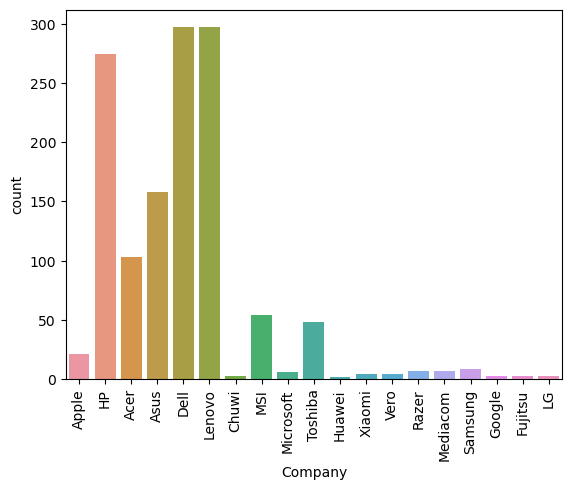

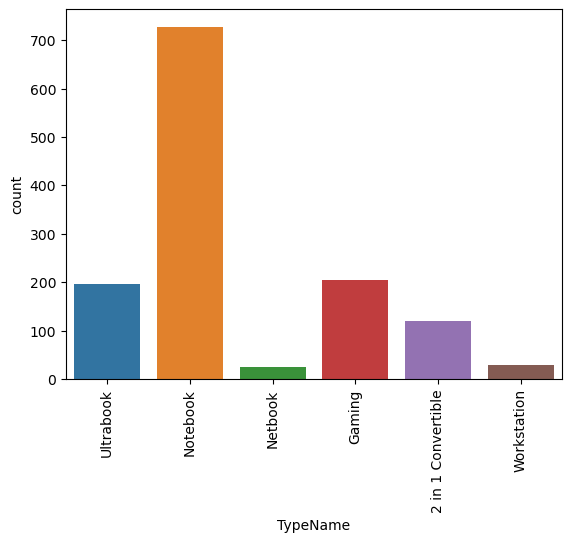

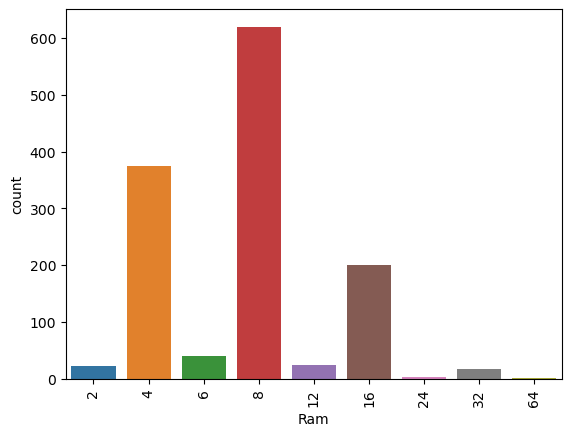

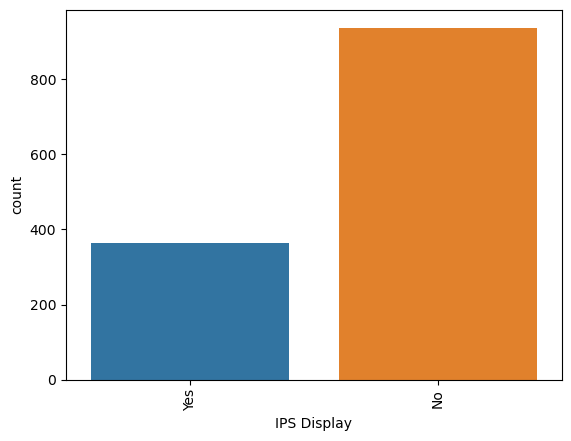

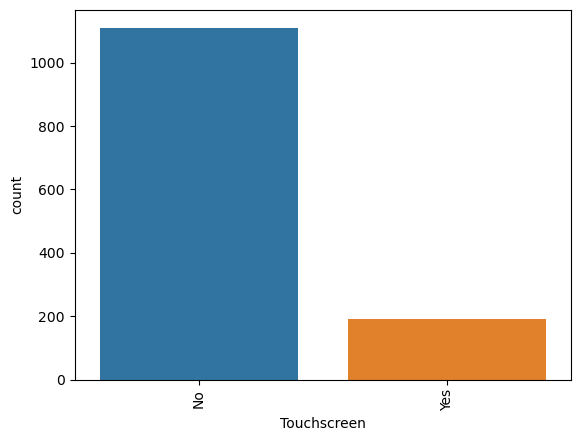

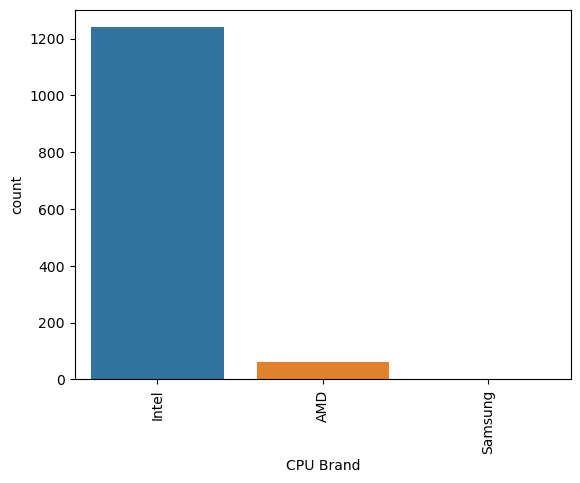

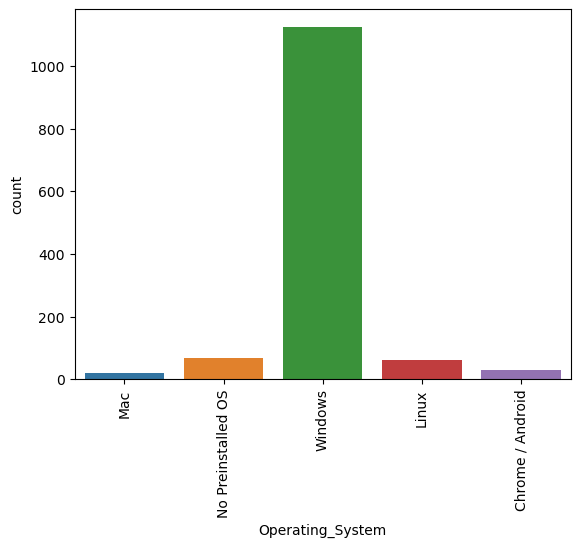

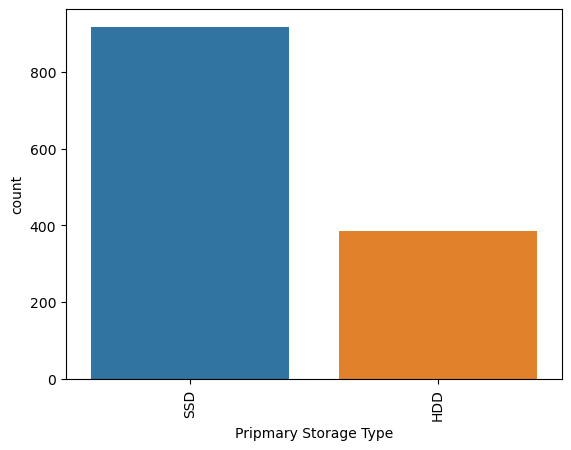

In [596]:
for column in Column_list_1:
    sns.countplot(x =column, data =Final_df)
    plt.xticks(rotation='vertical')
    plt.show()

**Findings:**
1. Dell,  Lenovo, HP, Acer, Asus, Apple are top most Laptop manufacturers.
2. Notebook type laptop are more popular, followed by Ultrabook and Gaming laptops
3. Out of 1300 Laptops, more than 600 kind of laptops of different makes have 8 GB of ram. 4GB and 16GB of RAMs are followed therfeter
4. Around 800 laptops have IPS display
5. In the listed laptops, very few as much as only 200 laptops have touchscreen feature.
6. Around 1200 laptos works on Intel make processors
7. Around 1100 laptops provided with windows operating sysytem.
8. In the era of fast data transfer and process optimization, more than 900 latops have SSD as a primary storage type.
    

### Bi-variate analysis

Here we will visualize variables with target variable 'Price_euros'

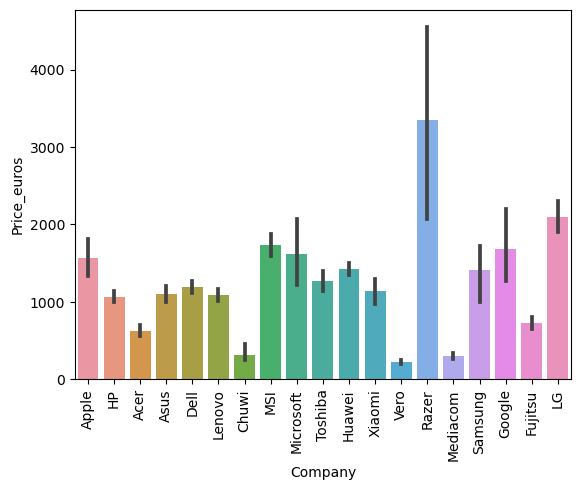

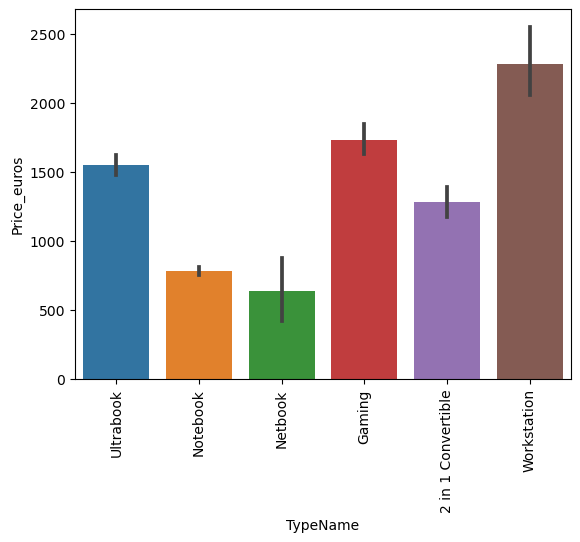

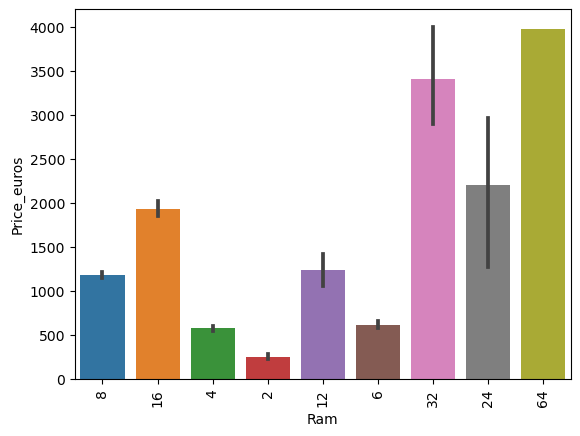

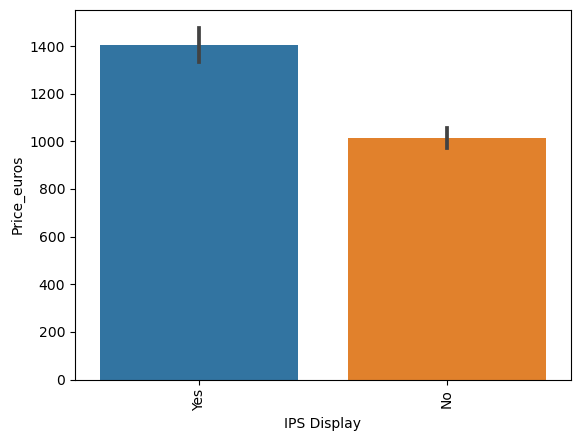

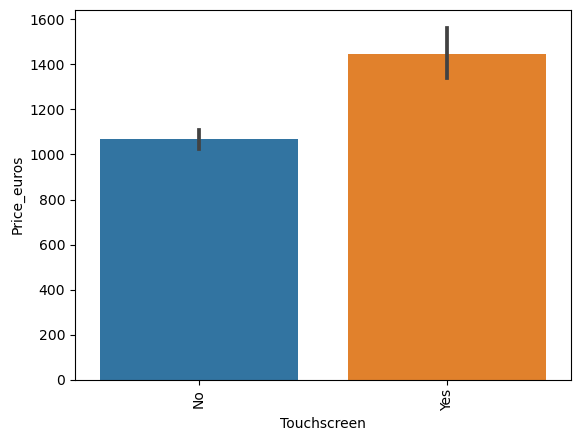

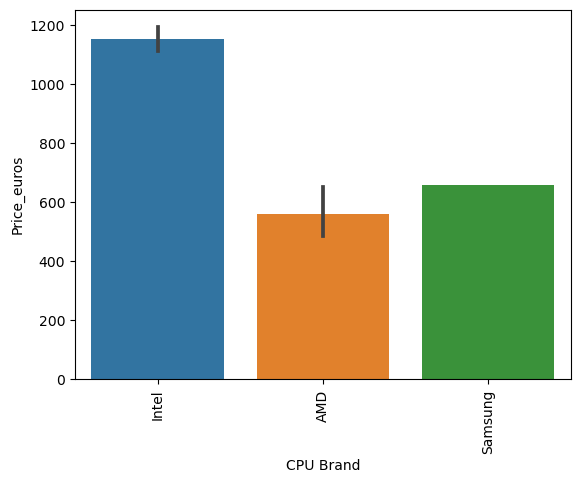

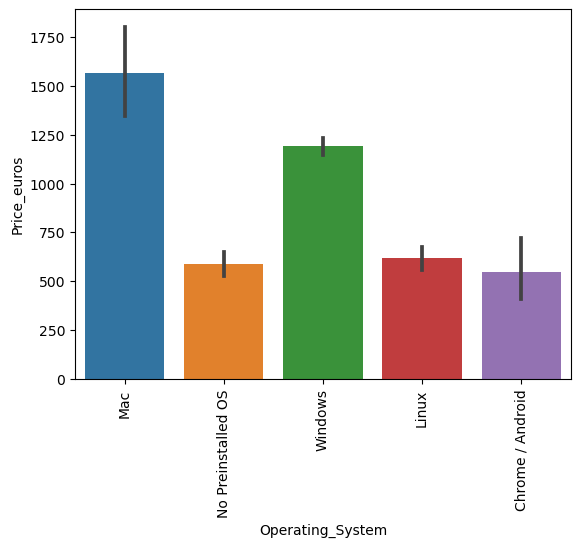

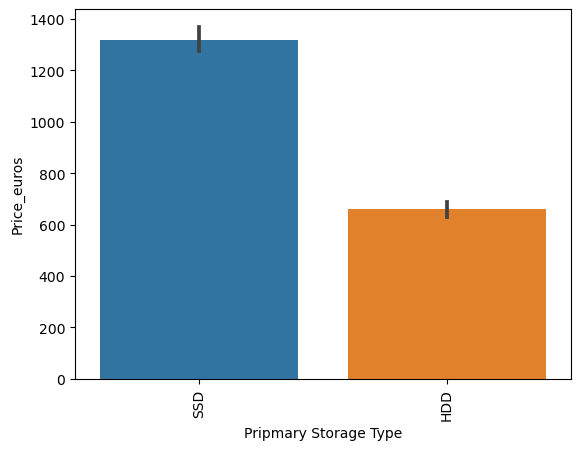

In [597]:
for column in Column_list_1:
    sns.barplot(x=df[column],y=df['Price_euros'])
    plt.xticks(rotation='vertical')
    plt.show()

**Findings :**

1. Razer laptops are most expensive, followed by LG, Apple, MSI, Google, Microsoft.
2. Workstation type of laptops are highest price followed by Gaming, Ultrabook, Convertible, etc.
3. As usual, Highest among the ram capacity i.e. 64GB RAM laptops are most expensive and linearly varying according capacity.
4. Prices of Intel processor latop are higher than AMD and Samsung
5. MAc installed laptops are highesin price range followed by Windows.
6. SSD as primary storage laptop are highest in price range

### 3. Looking for Correlations

Before proceeding with the feature selection, it is useful to establish a correlation between the response variable (in our case the Price_euro) and other predictor variables, as some of them might not have any major impact in determining price forecasting and will not be used in the analysis. There are many ways to discover correlation between the target variable and the rest of the features. Building `pair plots`, `scatter plots`, `heat maps`, and a `correlation matrixes` are the most common ones. Below, we will use the **corr()** function to list the top features based on the pearson correlation coefficient (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

In [598]:
df_num = Final_df
df_num_corr = df_num.corr()['Price_euros'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr.sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.7
print("There is {} strongly correlated values with price:\n{}".format(len(top_features), top_features))

There is 8 strongly correlated values with price:
Price_euros        1.000000
Ram                0.743007
X_pixles           0.556529
Y_pixles           0.552809
Weight             0.210370
Clock_Speed        0.169002
Inches             0.068197
Primary_Storage   -0.122365
Name: Price_euros, dtype: float64


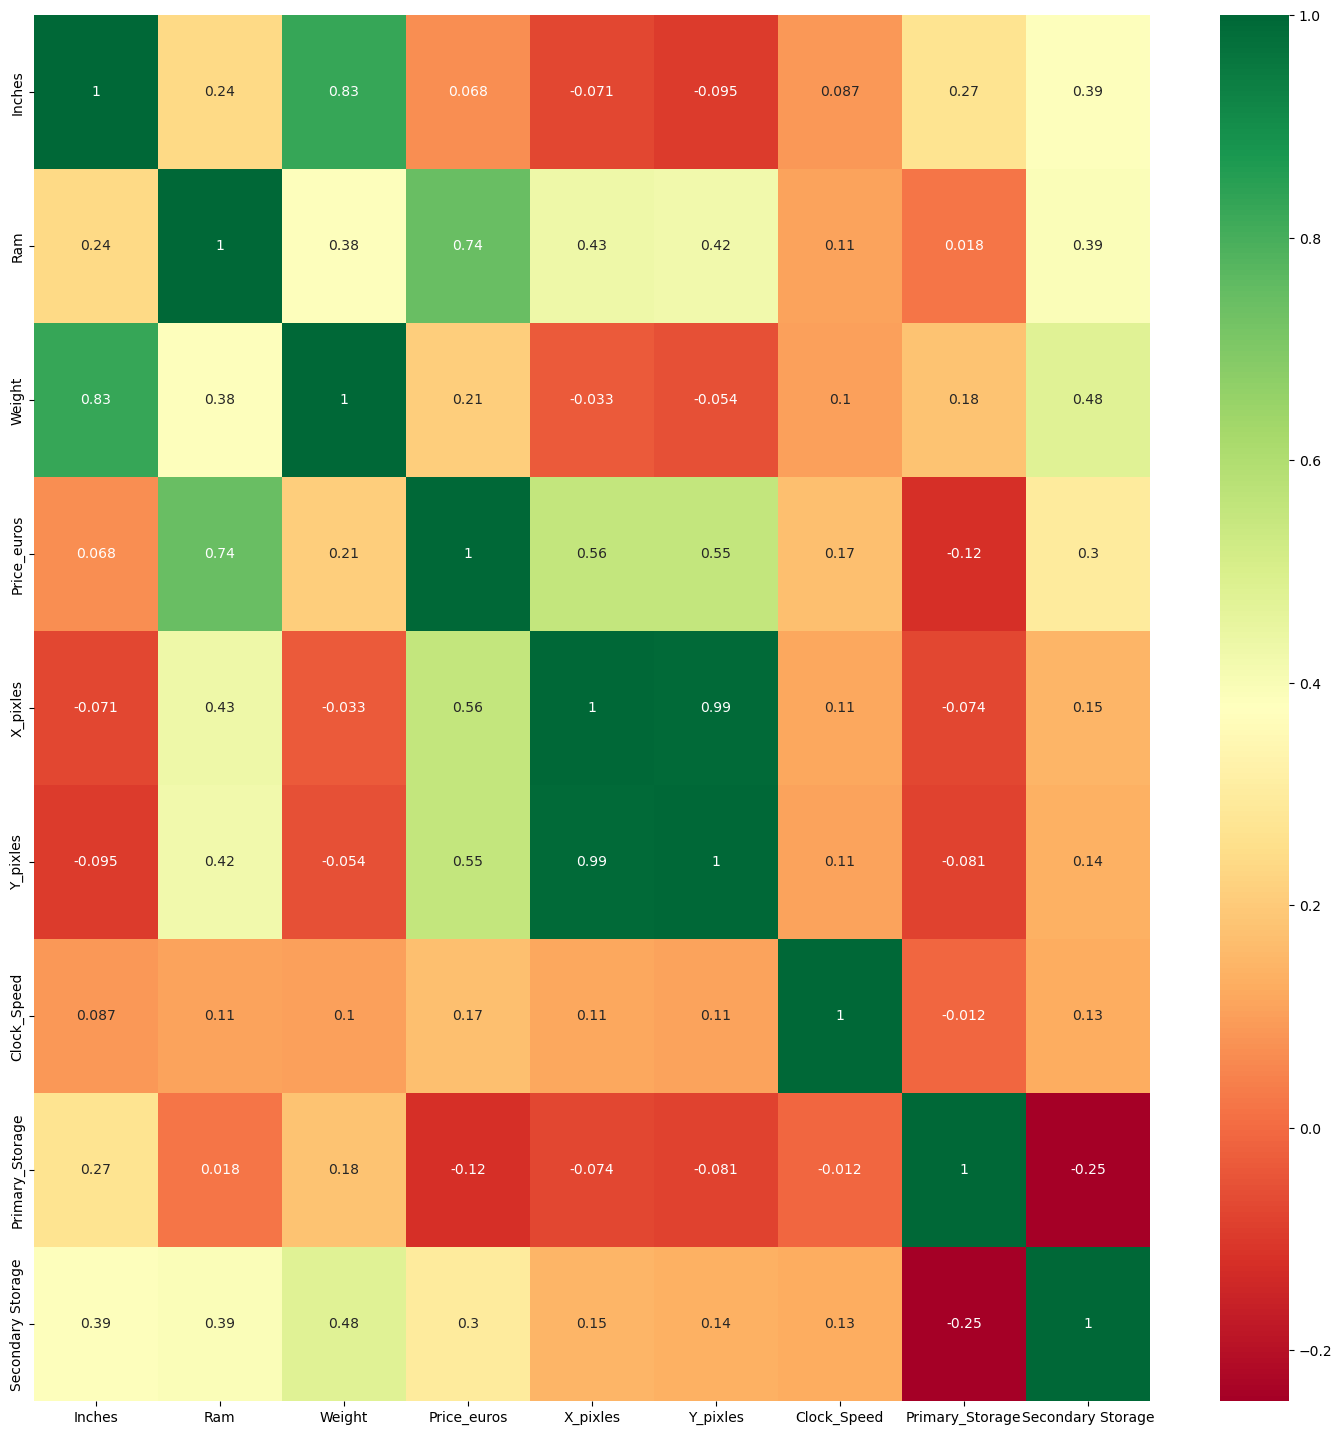

In [599]:
plt.figure(figsize=(18,18))
sns.heatmap(Final_df.corr(),annot=True,cmap='RdYlGn')

plt.show()

## **Feature Transformation**

Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


### **Dealing with Categorical Variables**

Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, We will use `unique()` method to obtain all the categories in this column.


### *one hot encoding*

Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. 

We will use, `get_dummies()` method to do this transformation.


In [600]:
Final_df.nunique()

Company                   19
TypeName                   6
Inches                    18
Ram                        9
Weight                   171
Price_euros              791
IPS Display                2
Full HD Display            2
Retina Ready               2
4K Ultra HD                2
Touchscreen                2
X_pixles                  13
Y_pixles                  10
CPU Brand                  3
Clock_Speed               29
Cpu Type                   5
Pripmary Storage Type      2
Secondary Memory           2
Primary_Storage           13
Secondary Storage          6
Secondary_Memory_Type      4
GPU_Brand                  4
Operating_System           5
dtype: int64

In [610]:
Categorical_columns = ['Company','TypeName','IPS Display','Full HD Display','Retina Ready','4K Ultra HD','Touchscreen','CPU Brand','Cpu Type','Pripmary Storage Type','Secondary Memory','Secondary_Memory_Type','GPU_Brand','Operating_System']

In [611]:
Final_df_1 = pd.get_dummies(data=Final_df, columns = Categorical_columns)

In [612]:
Final_df_1.head()

,Inches,Ram,Weight,Price_euros,X_pixles,Y_pixles,Clock_Speed,Primary_Storage,Secondary Storage,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,IPS Display_No,IPS Display_Yes,Full HD Display_No,Full HD Display_Yes,Retina Ready_No,Retina Ready_Yes,4K Ultra HD_No,4K Ultra HD_Yes,Touchscreen_No,Touchscreen_Yes,CPU Brand_AMD,CPU Brand_Intel,CPU Brand_Samsung,Cpu Type_AMD Processor,Cpu Type_Intel Core i3,Cpu Type_Intel Core i5,Cpu Type_Intel Core i7,Cpu Type_Other Intel Processor,Pripmary Storage Type_HDD,Pripmary Storage Type_SSD,Secondary Memory_No,Secondary Memory_Yes,Secondary_Memory_Type_HDD,Secondary_Memory_Type_Hybrid,Secondary_Memory_Type_NA,Secondary_Memory_Type_SSD,GPU_Brand_AMD,GPU_Brand_ARM,GPU_Brand_Intel,GPU_Brand_Nvidia,Operating_System_Chrome / Android,Operating_System_Linux,Operating_System_Mac,Operating_System_No Preinstalled OS,Operating_System_Windows
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0


### Splitting Dataset into Dependant and Independant Variable

In [613]:
x = Final_df_1.drop(columns=['Price_euros'])
y = np.log(Final_df_1['Price_euros'])

### Feature Scaling

In [614]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Num_columns = ['Inches','Ram','Weight','X_pixles','Y_pixles','Clock_Speed','Primary_Storage','Secondary Storage']
x[Num_columns] = scaler.fit_transform(x[Num_columns])

### Train-Test Split

In [615]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=22)

### Model Testing

In [616]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8166025753323419

In [617]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8516633255771431

In [618]:
from sklearn.linear_model import Ridge,Lasso
rdg = Lasso(alpha=0.0001)
rdg.fit(X_train,y_train)
rdg.score(X_test,y_test)

0.8194841018071048

In [619]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9125470448983117